## Demonstration of exposure simulation

In [1]:
import logging
import matplotlib.pyplot as plt

from astropy.coordinates import (
    SkyCoord,
    ICRS, AltAz
)
from astropy.time import Time
import astropy.units as u

from ctapointing.config import (
    Config,
)

from ctapointing.exposure import ExposureSimulator, Exposure
from ctapointing.exposure.utils import plot_exposure, plot_coords
from ctapointing.camera import ApogeeAspen8050Camera, MAGICCam

In [2]:
log = logging.getLogger()
log.setLevel(logging.INFO)

handler = logging.StreamHandler()
handler.setLevel(logging.INFO)
log.addHandler(handler)

In [3]:
Config.read_config('test_MAGIC_MAGICmask_CvE')
Config.image_path = "/Users/mhein/ctapointing/images"
Config.mask_path = "/Users/mhein/ctapointing/ctapointing/data/masks"
# Config.print()

In [4]:
pointingCamera = ApogeeAspen8050Camera()
pointingCamera.rotation = 180 * u.deg
pointingCamera.tilt = [1.1, 1.22] * u.deg

print(pointingCamera)

ApogeeAspen8050
  manufacturer:         Apogee Imaging Systems
  model:                Aspen CG8050-S-G01-HSH
  serial number:        None
  telescope id:         None
  used since:           None
  used until:           None
  focal length:         [50. 50.] mm
  pixel size:           5.4 micron
  number of pixels:     [2472, 3296]
  chip size:            [13348.8 17798.4] micron
  chip centre:          [1235.5 1647.5]
  pixel angle:          [22.27659907 22.27659907] arcsec
  pixel solid angle:    496.24686633431935 arcsec2
  camera field of view: [14.94796273 19.59410225] deg
  camera rotation:      180.0 deg
  camera tilts (x/y):   1.1 deg, 1.22 deg
  chip offsets (x/y):   0.0 m, 0.0 m
  location:             GeodeticLocation(lon=<Longitude -17.88 deg>, lat=<Latitude 28.75833333 deg>, height=<Quantity 2327. m>)


In [5]:
# science camera
sciencecamera = MAGICCam()
print(sciencecamera)

In [6]:
telescope_pointing = SkyCoord(ra=336.675*u.deg, dec=60.425*u.deg, frame=ICRS)

start_time = Time("2018-07-19T02:52:30.175")
duration = 10*u.s

simulator = ExposureSimulator()

simExposure = simulator.process(
    pointingCamera,
    telescope_pointing,
    start_time,
    duration,
    apply_moonlight=True,
    sciencecamera=sciencecamera
)

simulating image...
pointing <SkyCoord (ICRS): (ra, dec) in deg
    (336.675, 60.425)>
camera ApogeeAspen8050Camera(uuid=07b9190f-d7c0-41f3-873d-db4cc5a2cea7, name=ApogeeAspen8050, manufacturer=Apogee Imaging Systems, model=Aspen CG8050-S-G01-HSH)
exposure start: 2018-07-19T02:52:30.175, duration: 10.0 s
found 2 stars
found 6537 stars
smearing star positions by Gaussian of width 78 arcsec
rendering image...
applying moonlight
	using FoV of 27.1 deg
	using 10000 test coordinates
	hit efficiency is 54.1%
Sun is below horizon (-35.4 deg)
Moon is below horizon (-31.3 deg)
Moon phase is 98.7 deg (i.e. 65.2% full moon)
applying noise
constructing science camera structure
simulation finished (40.62 seconds).


In [7]:
print(simExposure)

Exposure:
  uuid:            185bf581-16f7-42d3-b8e8-5a5650ec89ea
  filename:        None
  start time:      2018-07-19T02:52:30.175
  duration:        10.0 s
  pressure:        None
  chip temp:       None
  camera temp:     None
  camera humidity: None
  camera config:   ApogeeAspen8050
Exposure Pointing:
  telescope_pointing: <SkyCoord (ICRS): (ra, dec) in deg
    (336.675, 60.425)>
  nominal_telescope_pointing: <SkyCoord (ICRS): (ra, dec) in deg
    (336.675, 60.425)>

  SimulationInfo:
    time step: 0.5 s
    min mag: -12.0
    max mag: 9.0
    fov: [14.94796273 19.59410225] deg



Analyse gaussian profile of leds

In [8]:
# first get the led positions in pixel, to find the pixel row through the led center
led_positions_pix = simExposure.transform_to_camera(sciencecamera.led_positions)
led_positions_pix = simExposure.camera.transform_to_pixels(led_positions_pix)
print(led_positions_pix)

[[1757.03048042 1844.86424541]
 [1710.84867356 1673.10950489]
 [1585.00950592 1547.43405252]
 [1413.28686026 1501.48130313]
 [1241.68638419 1547.505243  ]
 [1116.09168374 1673.07795048]
 [1070.03241919 1844.58337776]
 [1115.85715854 2016.26172496]
 [1241.45165612 2142.20823413]
 [1413.28686026 2188.50857955]
 [1585.24456857 2142.56091984]
 [1711.08377799 2016.71700972]]


In [9]:
print(simExposure.camera)

ApogeeAspen8050
  manufacturer:         Apogee Imaging Systems
  model:                Aspen CG8050-S-G01-HSH
  serial number:        None
  telescope id:         None
  used since:           None
  used until:           None
  focal length:         [50. 50.] mm
  pixel size:           5.4 micron
  number of pixels:     [2472, 3296]
  chip size:            [13348.8 17798.4] micron
  chip centre:          [1235.5 1647.5]
  pixel angle:          [22.27659907 22.27659907] arcsec
  pixel solid angle:    496.24686633431935 arcsec2
  camera field of view: [14.94796273 19.59410225] deg
  camera rotation:      180.0 deg
  camera tilts (x/y):   1.1 deg, 1.22 deg
  chip offsets (x/y):   0.0 m, 0.0 m
  location:             GeodeticLocation(lon=<Longitude -17.88 deg>, lat=<Latitude 28.75833333 deg>, height=<Quantity 2327. m>)


In [10]:
realExposure = Exposure.from_name(name='8907c27d-1223-40fe-ac9f-32590df40ffa', collection='MAGIC-Campaign')
realExposure.camera.tilt = [1.1, 1.22] * u.deg # same as camera for simulation (top of notebook)
print(realExposure)

reading from database collection MAGIC-Campaign
reading image from file image_1559342132_with_uuid.fits.gz
loading image from /Users/mhein/ctapointing/images/MAGIC-Campaign/image_1559342132_with_uuid.fits.gz


Exposure:
  uuid:            8907c27d-1223-40fe-ac9f-32590df40ffa
  filename:        image_1559342132_with_uuid.fits.gz
  start time:      2019-05-31T22:35:32.914
  duration:        10.0 s
  pressure:        None
  chip temp:       1.8042255 deg_C
  camera temp:     None
  camera humidity: None
  camera config:   MAGIC-001-precalibrated
Exposure Pointing:
  telescope_pointing: None
  nominal_telescope_pointing: <SkyCoord (ICRS): (ra, dec) in deg
    (197.2625, -2.07305556)>



In [11]:
print(realExposure.camera)

MAGIC-001-precalibrated
  manufacturer:         Apogee Imaging Systems
  model:                Aspen CG8050-S-G01-HSH
  serial number:        None
  telescope id:         None
  used since:           2018-07-07 00:00:00.000
  used until:           None
  focal length:         [0.05 0.05] m
  pixel size:           5.4e-06 m
  number of pixels:     [2472, 3296]
  chip size:            [0.0133488 0.0177984] m
  chip centre:          [1235.5 1647.5]
  pixel angle:          [22.27659907 22.27659907] arcsec
  pixel solid angle:    496.24686633431924 arcsec2
  camera field of view: [14.94796273 19.59410225] deg
  camera rotation:      180.0 deg
  camera tilts (x/y):   1.1 deg, 1.22 deg
  chip offsets (x/y):   0.0 m, 0.0 m
  location:             GeodeticLocation(lon=<Longitude -17.88 deg>, lat=<Latitude 28.75833333 deg>, height=<Quantity 2327. m>)


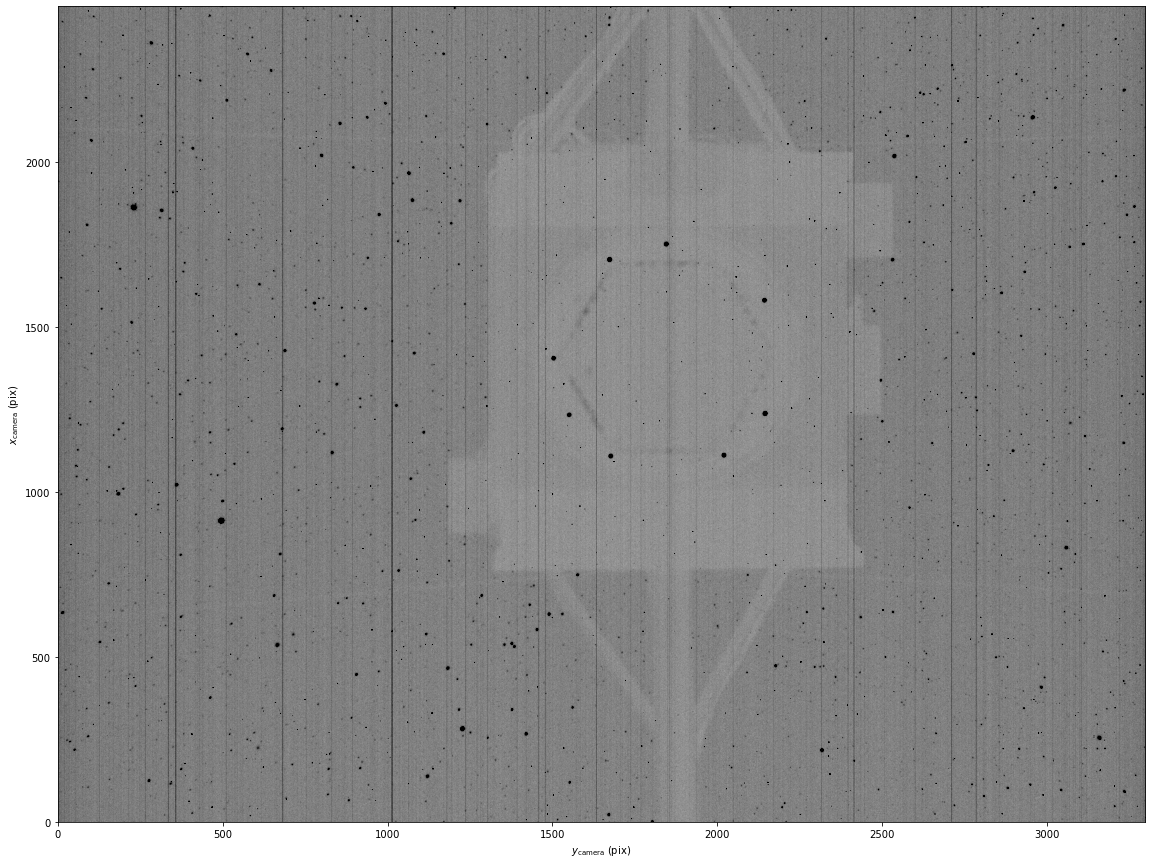

In [12]:
plot_exposure(realExposure)

In [13]:
from scipy.optimize import curve_fit
import numpy as np

def slice_rows(image, row, add_width, mean=False):
    
    if add_width == 0:
        return image[row]
    
    sliced_row = np.zeros(image.shape[1])
    c = 0
    for r in range(row - add_width, row + add_width+1, 1):
        sliced_row += image[r]
        c+=1

    print("number of considered rows:", c)

    if mean: # TODO: not working
        print("mean not working yet...")
        print("returned sum...")
        # sliced_row /= (2*add_width + 1)

    return sliced_row

def gaussian(x, mu, sigma, scale, offset=0):
    gauss = 1 / np.sqrt(2 * np.pi * sigma**2) * np.exp(-0.5 * ((x - mu) / sigma)**2 )
    return scale * gauss + offset

def fit_intensity_through_LED_slice(image, 
                                    selected_led_positions_pix, 
                                    add_rows_arround, 
                                    view_range,
                                    fit_p0=None,
                                    plot=True,
                                    plot_title=None
                                    ):
    slice_row = selected_led_positions_pix[0].astype(int)
    led_slice = slice_rows(image, slice_row, add_rows_arround)

    view_range = (int(selected_led_positions_pix[1]) - view_range,
                  int(selected_led_positions_pix[1]) + view_range)

    y = led_slice[view_range[0]:view_range[1]]
    x = range(view_range[0], view_range[1])

    print("data to fit:", y)

    ## make gaussian fit
    # compare width sigma [pix] with original radius [meters]
    popt, pcov = curve_fit(gaussian, x, y, p0=fit_p0, absolute_sigma=False)
    p_err = np.sqrt(np.diag(pcov))

    print("p0: \t mu: {:.5f} pix, sigma: {:.5f} pix, scale: {:.5f} pix, offset: {:.5f}".format(*p0))
    print("popt: \t mu: {:.5f} pix, sigma: {:.5f} pix, scale: {:.5f} pix, offset: {:.5f}".format(*popt))
    # print("pcov:\n", pcov)
    print("p_err:", p_err, "[pix]")

    if plot:
        fig, ax = plt.subplots(figsize=(8,6))

        ax.plot(x, y, "kx", label=f"{2*add_rows_arround + 1} rows")
        x_g = np.linspace(np.min(x), np.max(x), 100)
        ax.plot(x_g, gaussian(x_g, *popt),"--", color="orange", label="gaussian fit")

        ax.set_xlabel("Column pixel")
        ax.set_ylabel("Intensity")

        if plot_title is not None:
            ax.set_title(plot_title)
        ax.legend()

        plt.show()

led position of led 10: [1585.24456857 2142.56091984]
number of considered rows: 21
data to fit: [21000. 21060. 21000. 21000. 21060. 21120. 21060. 21660. 21660. 22380.
 23040. 24300. 24840. 26520. 25860. 26340. 27600. 27180. 26100. 25620.
 24780. 23460. 22260. 21720. 21240. 21300. 21300. 21120. 21000. 21000.]
p0: 	 mu: 2142.56092 pix, sigma: 3.00000 pix, scale: 9000.00000 pix, offset: 21000.00000
popt: 	 mu: 2142.73720 pix, sigma: 3.90565 pix, scale: 61233.74883 pix, offset: 20945.32495
p_err: [1.09982496e-01 1.44798495e-01 2.67858827e+03 1.07310724e+02] [pix]


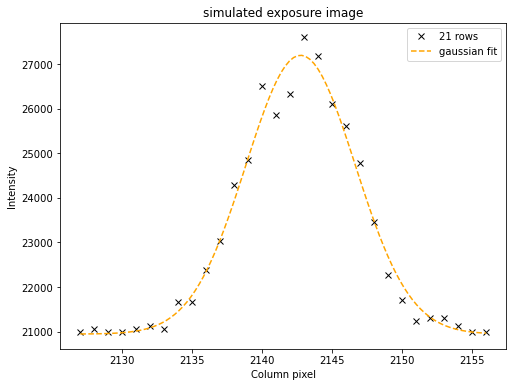

number of considered rows: 21
data to fit: [27760. 27722. 27661. 27980. 27712. 28293. 28643. 30404. 33446. 36788.
 37301. 37177. 37715. 38318. 39199. 39401. 38808. 39127. 34429. 30396.
 28549. 28607. 27428. 27845. 27287. 27322. 27697. 28010. 27565. 27848.]
p0: 	 mu: 2142.56092 pix, sigma: 3.00000 pix, scale: 9000.00000 pix, offset: 21000.00000
popt: 	 mu: 2140.36434 pix, sigma: 4.05102 pix, scale: 129937.67947 pix, offset: 27218.12029
p_err: [2.06022537e-01 2.77988161e-01 1.06910860e+04 4.20545458e+02] [pix]


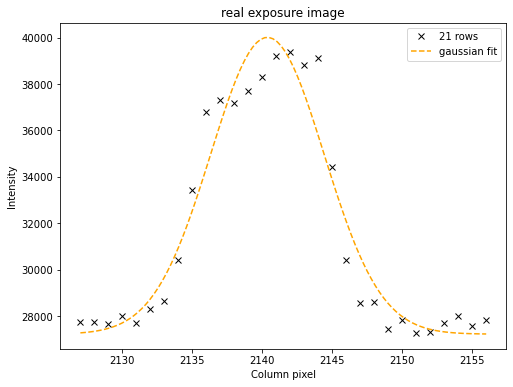

In [14]:
# not 3, 6, 9, 11
select_led = 10
selected_led_positions_pix = led_positions_pix[select_led]
add_rows_arround = 10
view_range = 15 #(1835, 1855)

print(f"led position of led {select_led}: {selected_led_positions_pix}")
## for simulated exposure image
m = selected_led_positions_pix[1]
s = 3.0 # 2.7250318529031574 for 5e-3 meter
a = 9000 # magiccam.led_intensity[select_led] / 1000
o = (2*add_rows_arround + 1) * sciencecamera.body_intensity

p0 = [m, s, a, o]

fit_intensity_through_LED_slice(
    simExposure.image.value, 
    selected_led_positions_pix, 
    add_rows_arround, 
    view_range,
    fit_p0=p0,
    plot=True,
    plot_title="simulated exposure image"
)

## for real exposure image
m = selected_led_positions_pix[1]
s = 3.0 # 2.7250318529031574 for 5e-3 meter
a = 9000 # magiccam.led_intensity[select_led] / 1000
o = (2*add_rows_arround + 1) * sciencecamera.body_intensity

p0 = [m, s, a, o]

fit_intensity_through_LED_slice(
    realExposure.image, 
    selected_led_positions_pix, 
    add_rows_arround, 
    view_range,
    fit_p0=p0,
    plot=True,
    plot_title="real exposure image"
)

In [15]:
# pix = 1e4 / 17 * m
pix = 1e4 / 18 * 5e-3
print(pix)
# m = 17 / 1e4 * pix
met = 18 / 1e4 * 3.9
print(met)

pix = 1e4 / 18 * met
print(pix)

3.8/np.sqrt(30000)

2.7777777777777777
0.007019999999999999
3.8999999999999995


0.02193931022920578

In [16]:
1e-3 / 17 * 180/np.pi * 3600 * 22

266.93092573153643

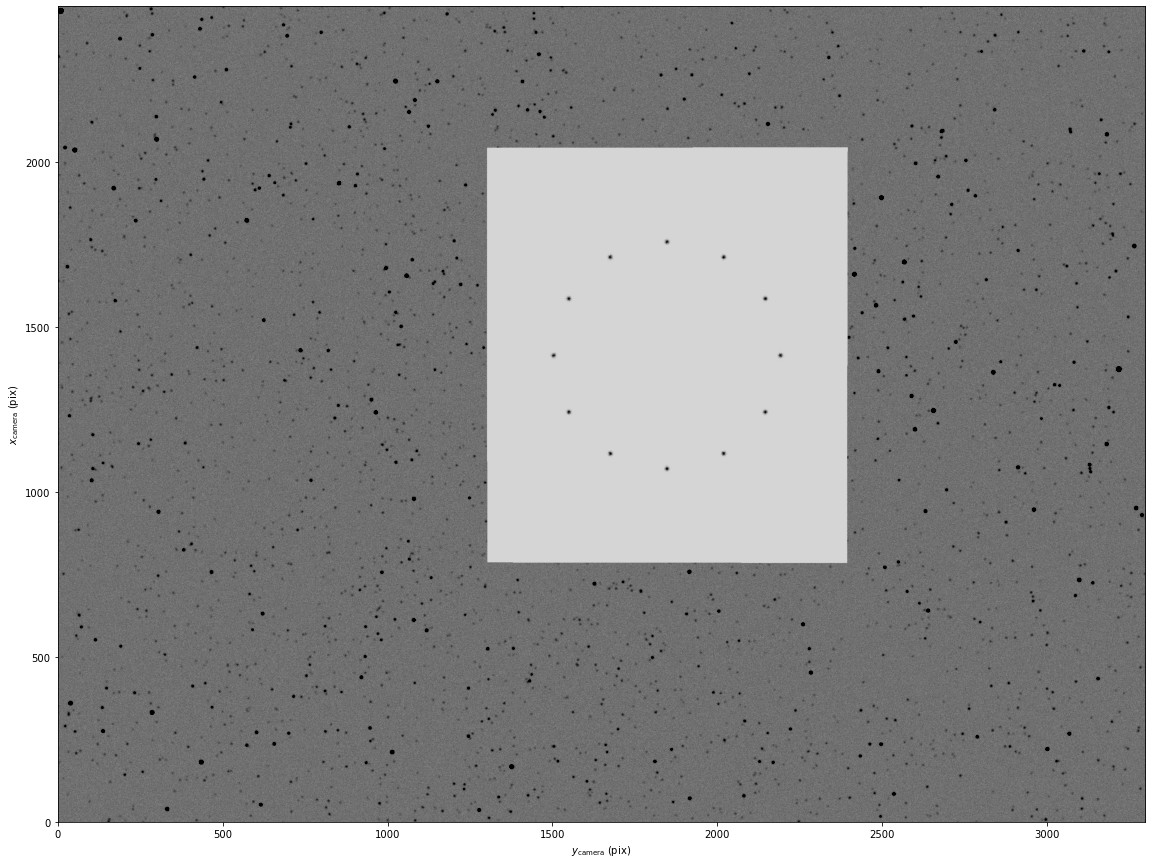

In [17]:
im = plot_exposure(simExposure)

# plot simulated star positions
true_star_positions = simExposure.simulation_info.coords_pix_meanexp
mask = pointingCamera.clip_to_chip(true_star_positions)

# plot_coords(true_star_positions[mask],
#             camera=exposure.camera, ax=im.axes)

plt.show()

simExposure.write_to_fits("simulation.fits",force_overwrite=True)


In [18]:
print(exposure)

NameError: name 'exposure' is not defined

In [ ]:
# e = Exposure.from_name("simulation.fits", read_meta_from_fits=True)

# e.camera = pointingCamera

# print(e)
# plot_exposure(e)